In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('creditcard.csv')

In [23]:
non_fraud = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [24]:
X = data.drop(columns='Class', axis=1)
Y = data['Class']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_non_fraud = non_fraud.drop(columns='Class', axis=1)
X_non_fraud_scaled = scaler.fit_transform(X_non_fraud)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

In [29]:
X_non_fraud = X_resampled[Y_resampled == 0]

In [30]:
one_class_svm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.05)
one_class_svm.fit(X_non_fraud)

OneClassSVM(gamma=0.01, nu=0.05)

In [31]:
test_predictions = one_class_svm.predict(X_test)

In [17]:
test_predictions = np.where(test_predictions == -1, 1, 0)

In [18]:
print("Classification Report:")
print(classification_report(Y_test, test_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.97     56962



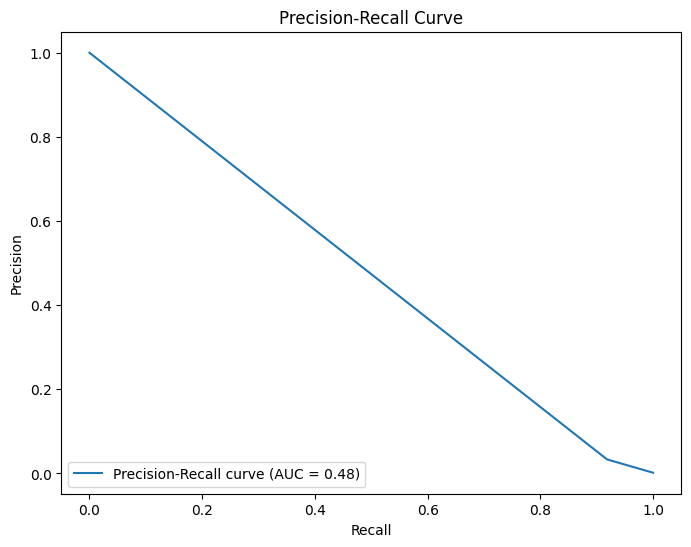

AUC-PR: 0.48


In [19]:
precision, recall, thresholds = precision_recall_curve(Y_test, test_predictions)
auc_pr = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

print(f"AUC-PR: {auc_pr:.2f}")

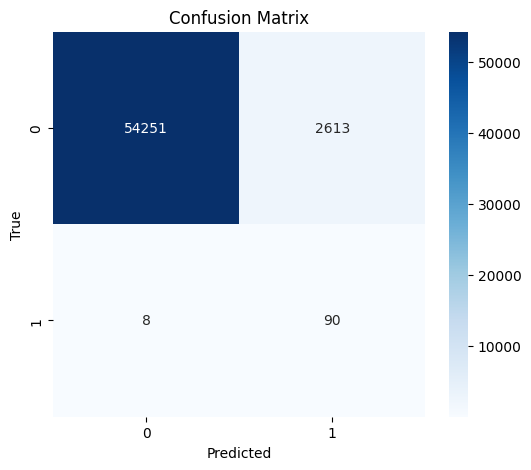

In [20]:
cm = confusion_matrix(Y_test, test_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()